# Marketing Case Study

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Customer Segmentation

A key objective is to create a predictive model which allows the company to maximize the profits of the next marketing campaign.

In [8]:
# load data
with open("processed_data2.csv", "r") as f:
    seg_df = pd.read_csv(f)

seg_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Total_Food,Length_customer_yrs,Tot_Num_Purchases
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,1,0,SP,52,0,972,8.08,14.0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,1,1,0,CA,61,0,540,8.08,17.0
2,Graduation,Couple,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,US,64,1,221,8.18,10.0
3,Graduation,Couple,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,AUS,55,2,11,8.18,3.0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,0,0,1,0,SP,33,1,57,8.27,6.0


In [9]:
seg_df.drop(columns=["Response"], inplace=True)

In [10]:
seg_df.columns.to_list()

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Country',
 'Age',
 'Dependents',
 'Total_Food',
 'Length_customer_yrs',
 'Tot_Num_Purchases']

In [11]:
# seg_df = pd.DataFrame(data[seg_cols])

In [12]:
seg_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Dependents,Total_Food,Length_customer_yrs,Tot_Num_Purchases
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,0,SP,52,0,972,8.08,14.0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,1,0,CA,61,0,540,8.08,17.0
2,Graduation,Couple,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,US,64,1,221,8.18,10.0
3,Graduation,Couple,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,AUS,55,2,11,8.18,3.0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,0,0,0,0,SP,33,1,57,8.27,6.0


In [13]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2192 non-null   object 
 1   Marital_Status       2192 non-null   object 
 2   Income               2192 non-null   float64
 3   Kidhome              2192 non-null   int64  
 4   Teenhome             2192 non-null   int64  
 5   Recency              2192 non-null   int64  
 6   MntWines             2192 non-null   int64  
 7   MntFruits            2192 non-null   int64  
 8   MntMeatProducts      2192 non-null   int64  
 9   MntFishProducts      2192 non-null   int64  
 10  MntSweetProducts     2192 non-null   int64  
 11  MntGoldProds         2192 non-null   int64  
 12  NumDealsPurchases    2192 non-null   int64  
 13  NumWebPurchases      2192 non-null   int64  
 14  NumCatalogPurchases  2192 non-null   int64  
 15  NumStorePurchases    2192 non-null   i

In [15]:
# del data

## Pre-Processing Data

Performing customer segmentation using machine learning requires some preprocessing of the data.
- First, if the data are skewed, then the data needs to be transformed
- Next, there are a few categorical features that need to be encoded
- Finally, the data are normalized

Use sklearn pipeline to streamline the pre-processing of data needed before modeling.

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

In [16]:
# scale numerical features
num_features = seg_df.select_dtypes(exclude="object").columns
num_scaler = Pipeline(
    steps=[('scaler', MinMaxScaler())]
)

# nominal categorical data
nom_cat = ['Marital_Status', 'Country']
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")

# ordered categorical data
ord_cat = ['Education']
ord_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers= [
        ("scaler", num_scaler, num_features),
        ("nom", one_hot_encoder, nom_cat),
        ("ord", ord_encoder, ord_cat)
    ]
)

In [17]:
# preprocessor

In [18]:
prep_data = preprocessor.fit_transform(seg_df)

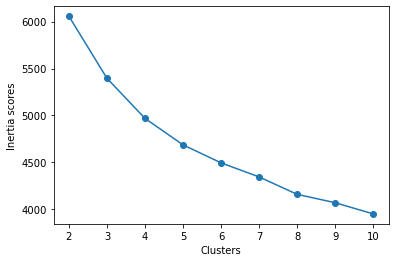

In [19]:
inertia_scores = []
silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters = n, init="k-means++", random_state =43)
    kmeans.fit(prep_data)
    inertia_scores.append(kmeans.inertia_)
    sscore = silhouette_score(prep_data, kmeans.labels_)
    silhouette_scores.append(sscore)

plt.plot(range(2, 11), inertia_scores, marker = "o")
plt.xlabel("Clusters")
plt.ylabel("Inertia scores")
plt.show()

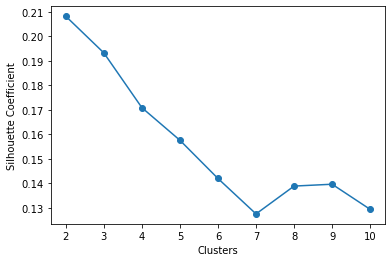

In [20]:
plt.plot(range(2, 11), silhouette_scores, marker = "o")
plt.xticks(range(2,11))
plt.xlabel("Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Another method to used evaluate what value of k to use is with the kneed module.

In [21]:
from kneed import KneeLocator

kl = KneeLocator(
    range(2, 11), inertia_scores, curve="convex", direction="decreasing"
)

In [22]:
kl.elbow

5

## Modeling

Add KMeans model to pipeline.

We will also use PCA to reduce the number of dimensions to 2

In [23]:
from sklearn.decomposition import PCA

reduce_dim = Pipeline(
    [('reduce_dim', 
        PCA(n_components=2, random_state=42)
        )])

In [24]:
n_clusters = 5

segmenter = Pipeline(
    [("kmeans",
        KMeans(
            n_clusters=n_clusters,
            init="k-means++",
            n_init=10,
            max_iter=300,
            random_state=3
        ))])

In [25]:
clf_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("reduce_dim", reduce_dim),
        ("segmenter", segmenter)
        ])

In [26]:
kmeans = clf_pipe.fit(seg_df)
preds = kmeans.predict(seg_df)
seg_df['Cluster'] = preds + 1

In [27]:
# counts of clusters with PCA
seg_df['Cluster'].value_counts()

1    646
3    504
2    475
5    316
4    251
Name: Cluster, dtype: int64

In [28]:
# count of clusters before PCA
# seg_df['Cluster'].value_counts()

In [29]:
pcadf = pd.DataFrame(
    clf_pipe[:-1].transform(seg_df),
    columns=["component_1", "component_2"])

pcadf["predicted_cluster"] = clf_pipe["segmenter"]["kmeans"].labels_

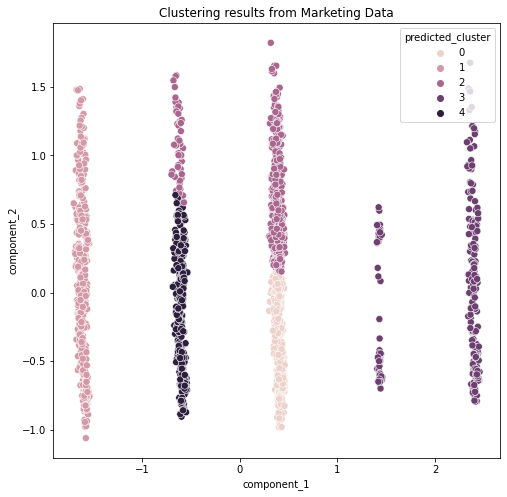

In [30]:
plt.figure(figsize=(8,8))
g = sns.scatterplot(
    "component_1", "component_2",
    data=pcadf,
    hue="predicted_cluster",
    s=50
)
g.set_title("Clustering results from Marketing Data")
plt.show()

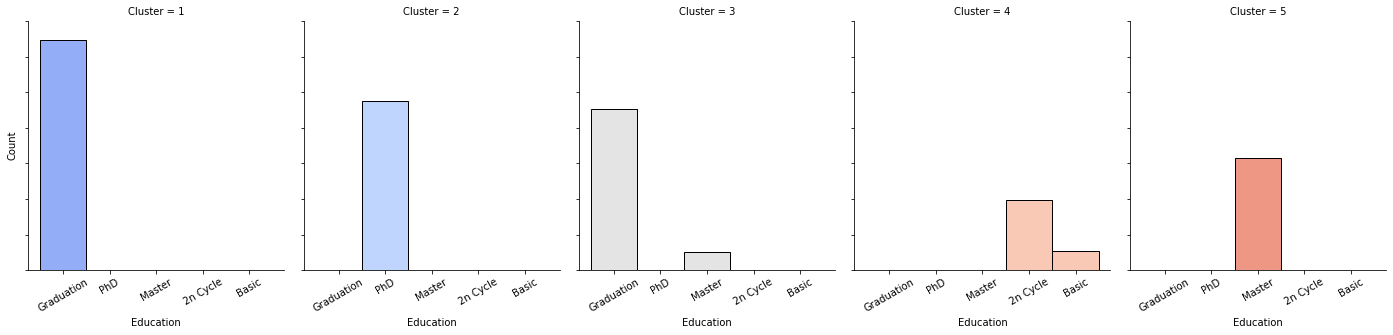

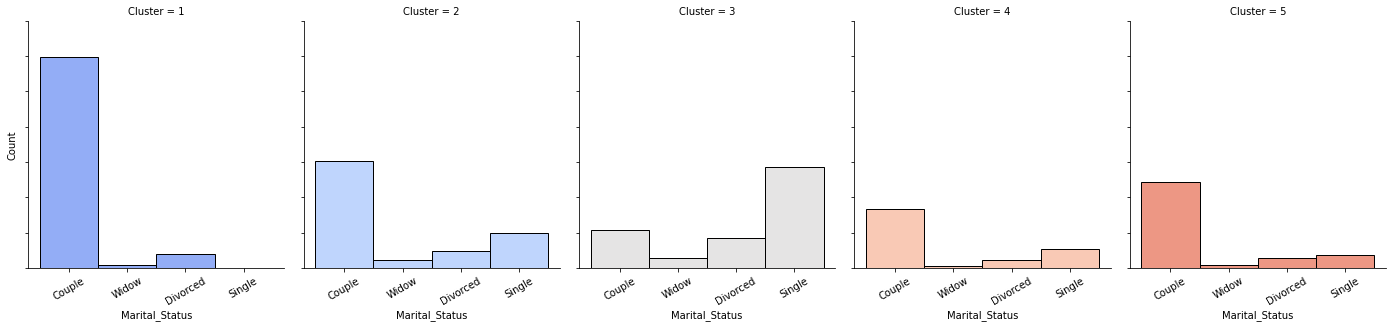

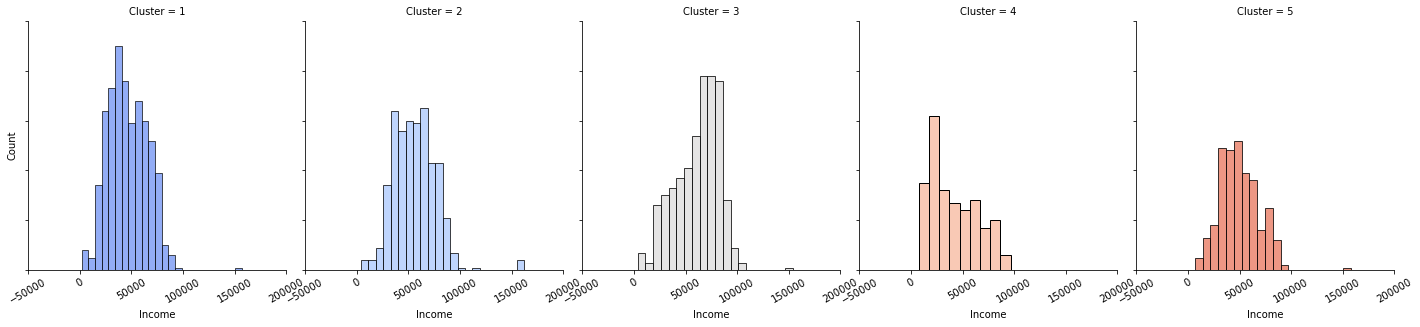

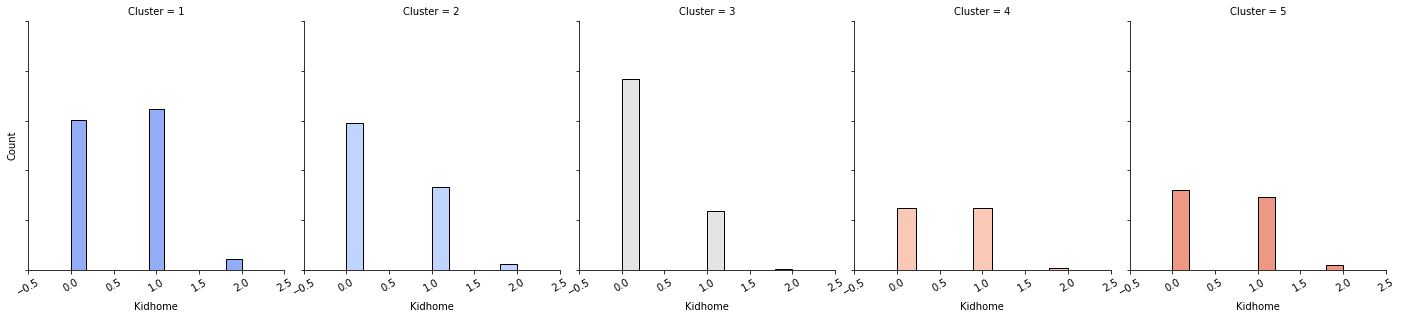

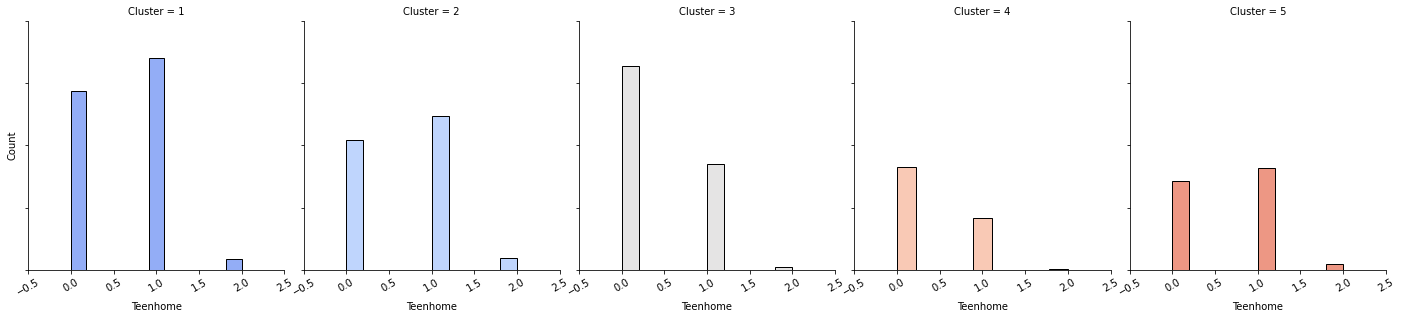

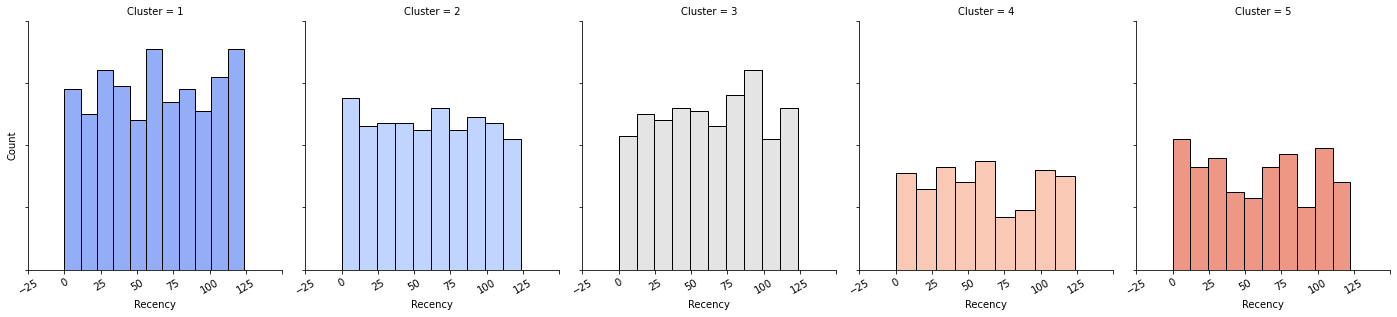

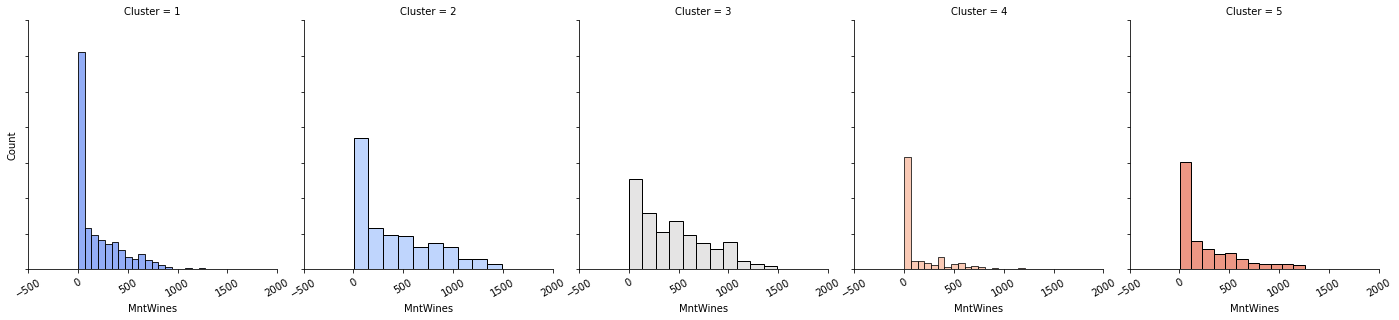

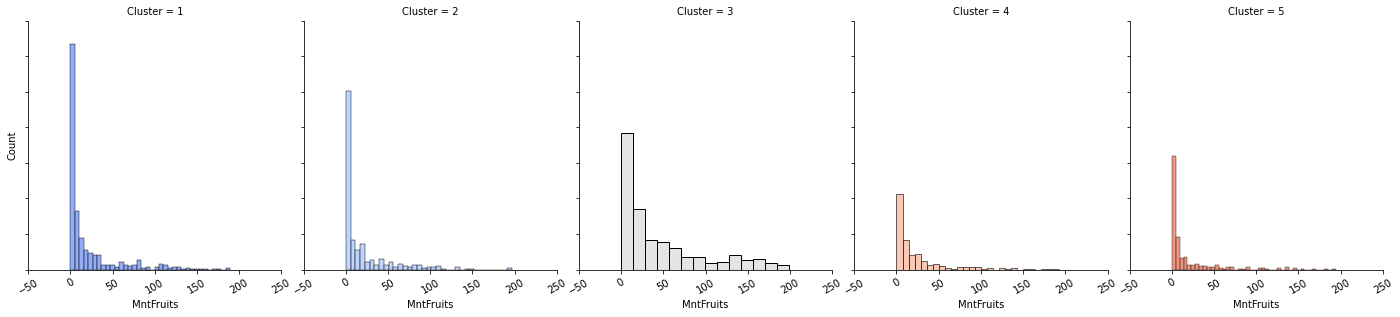

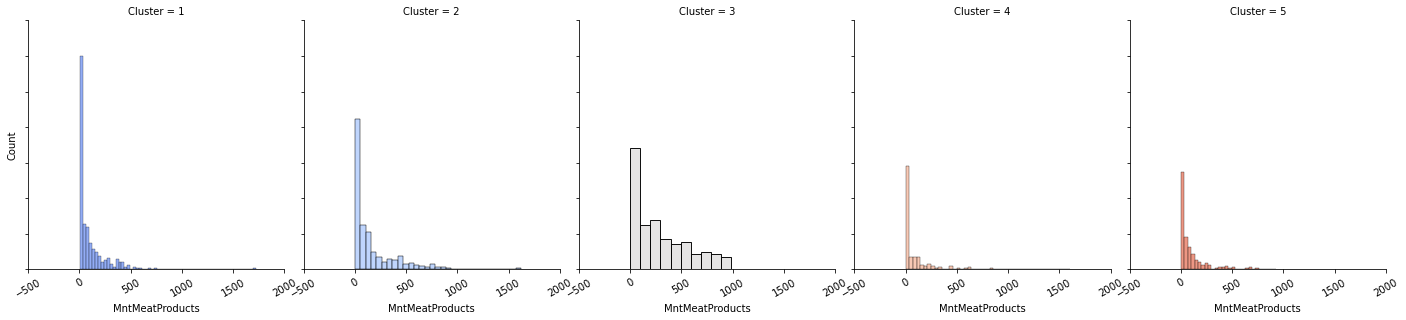

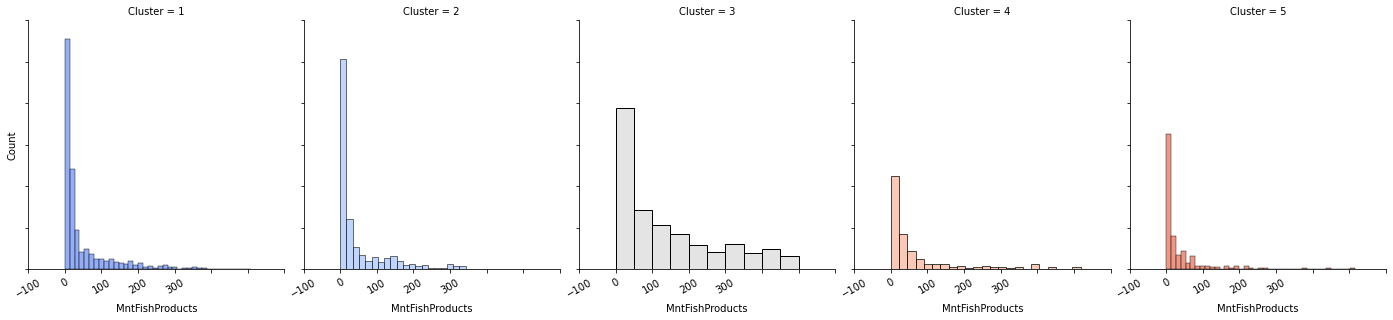

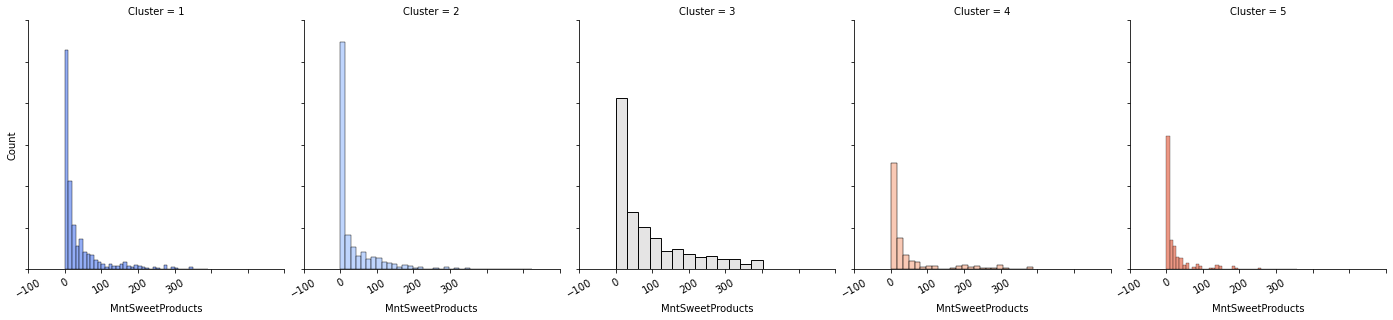

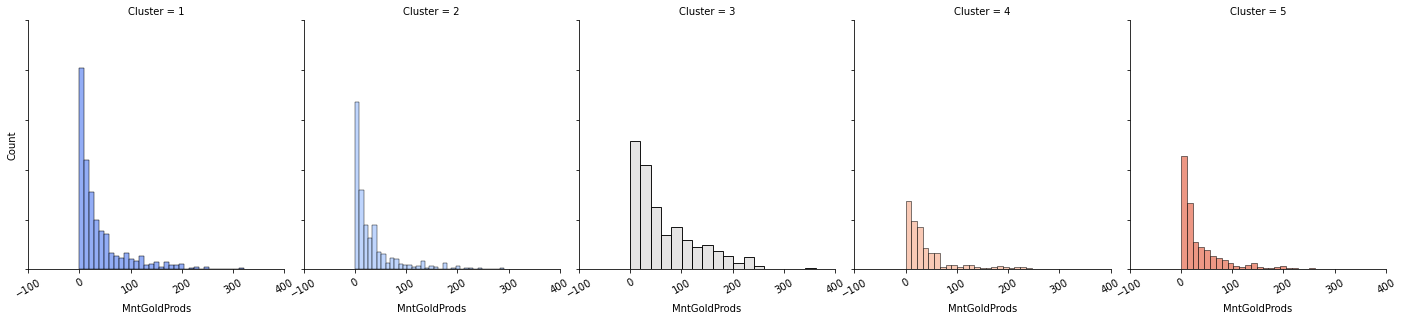

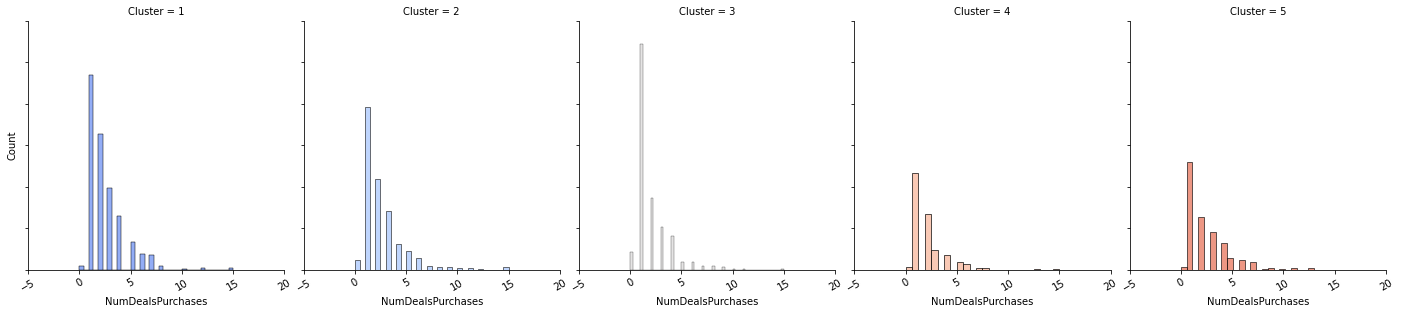

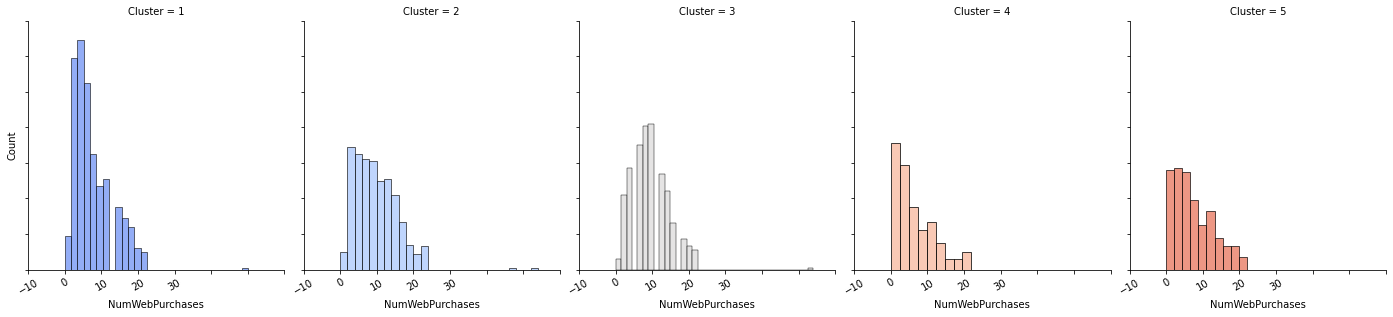

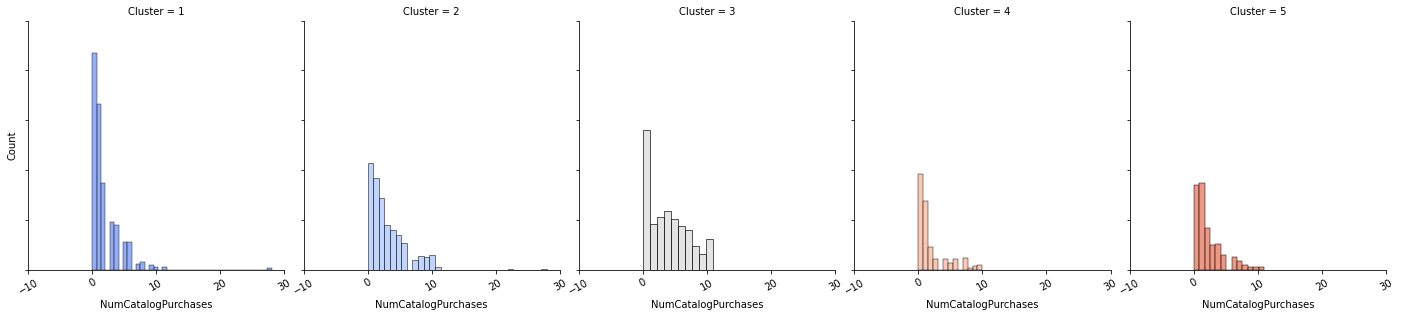

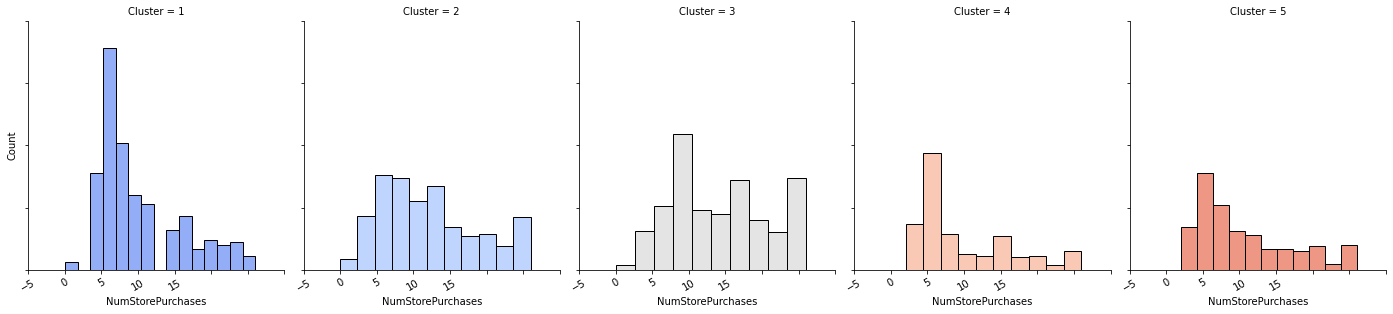

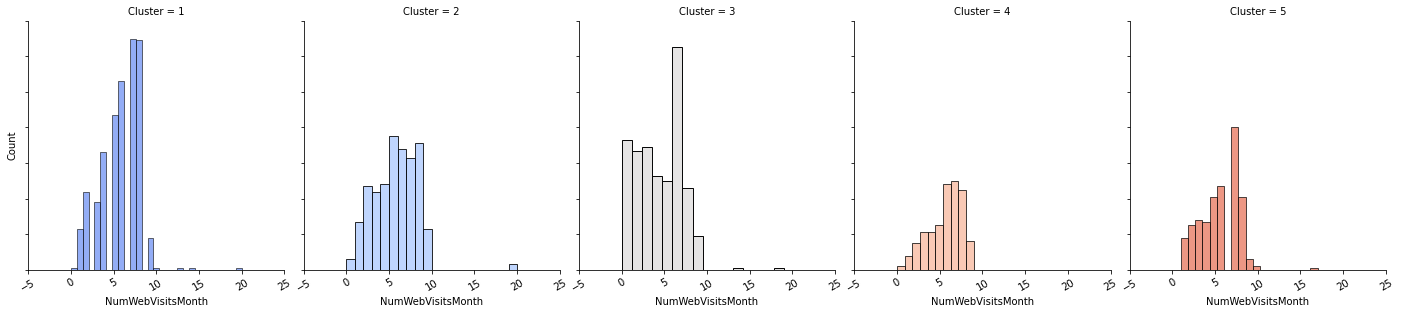

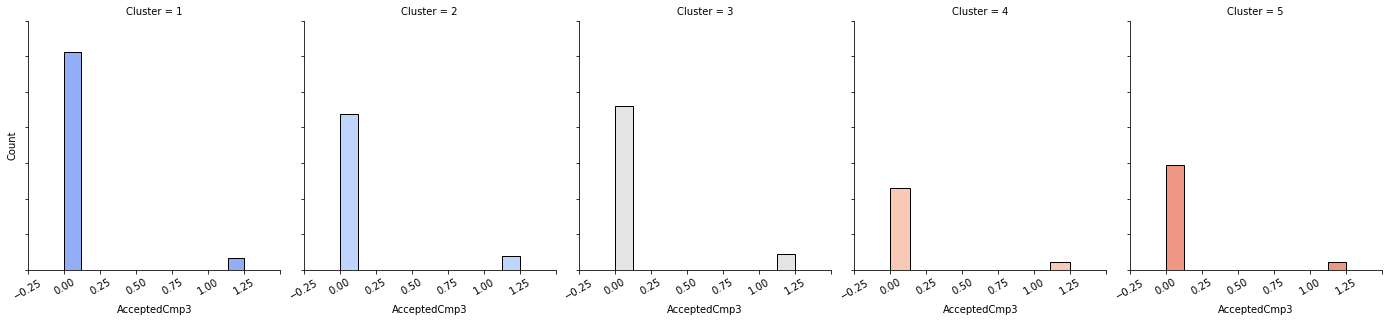

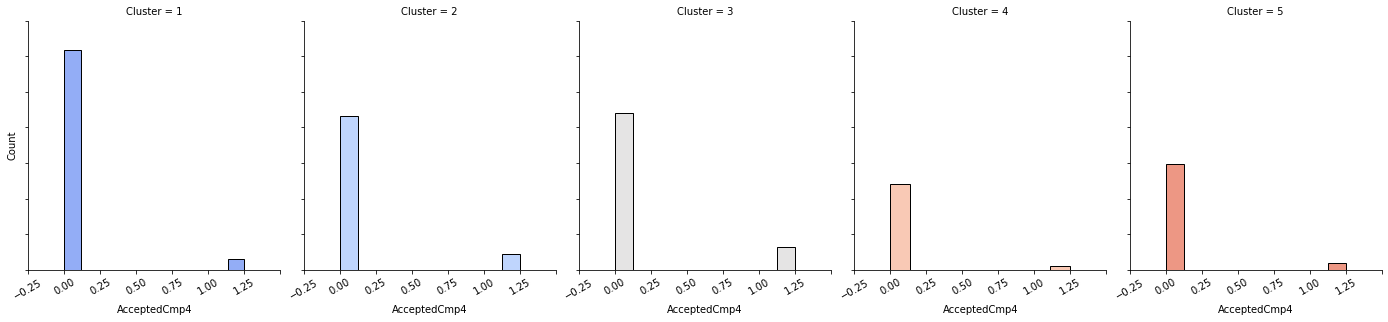

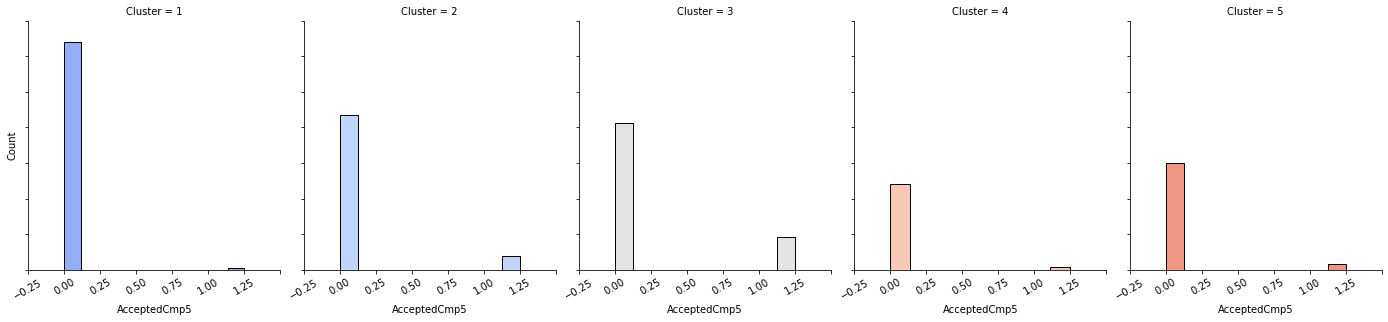

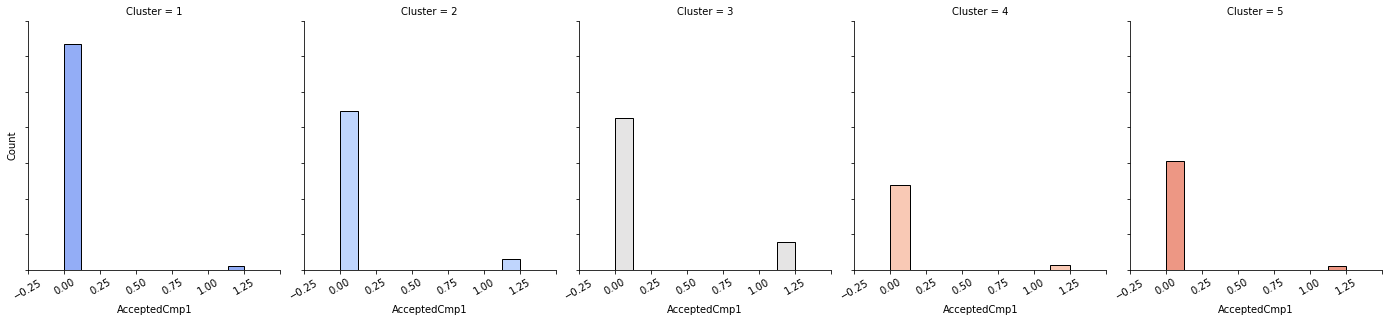

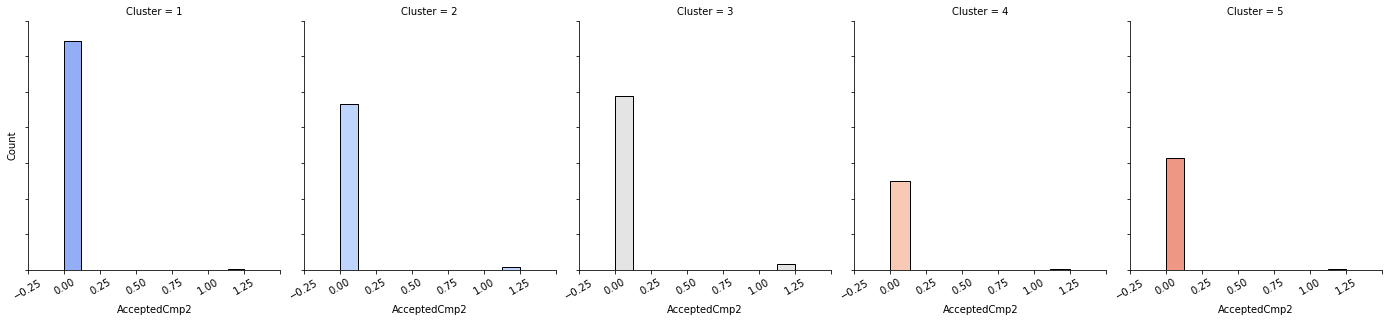

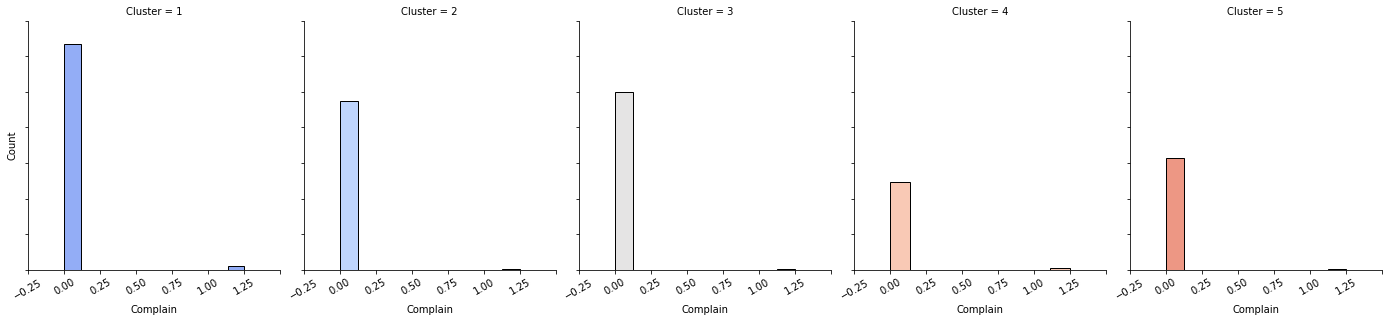

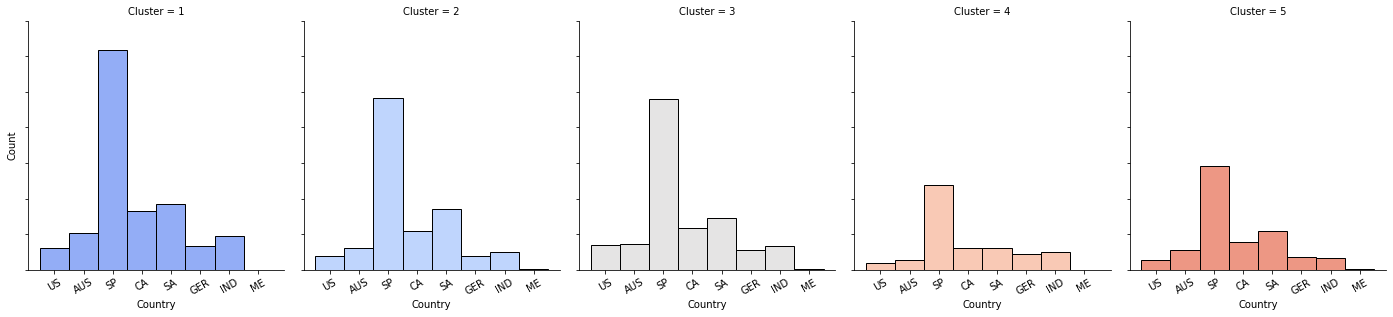

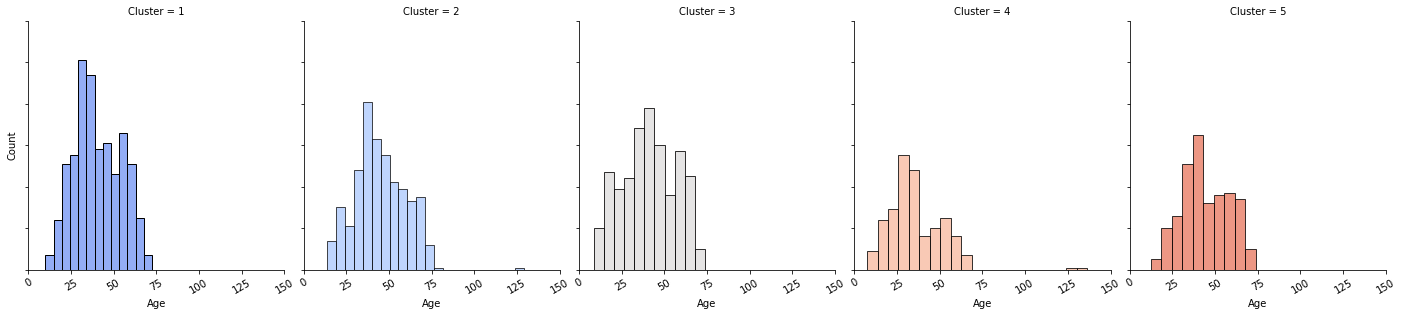

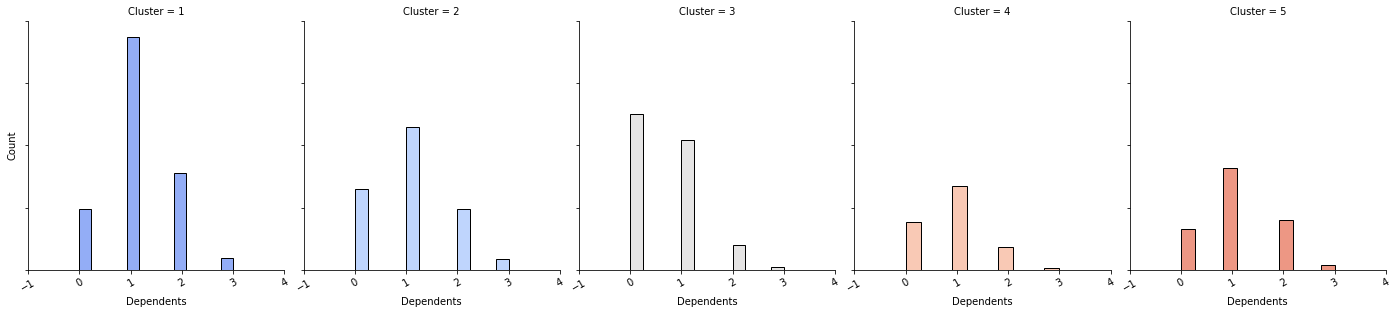

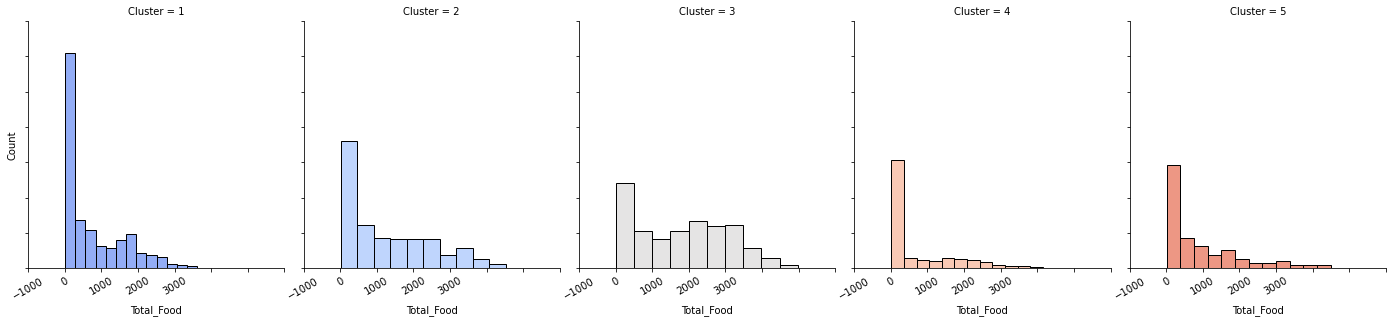

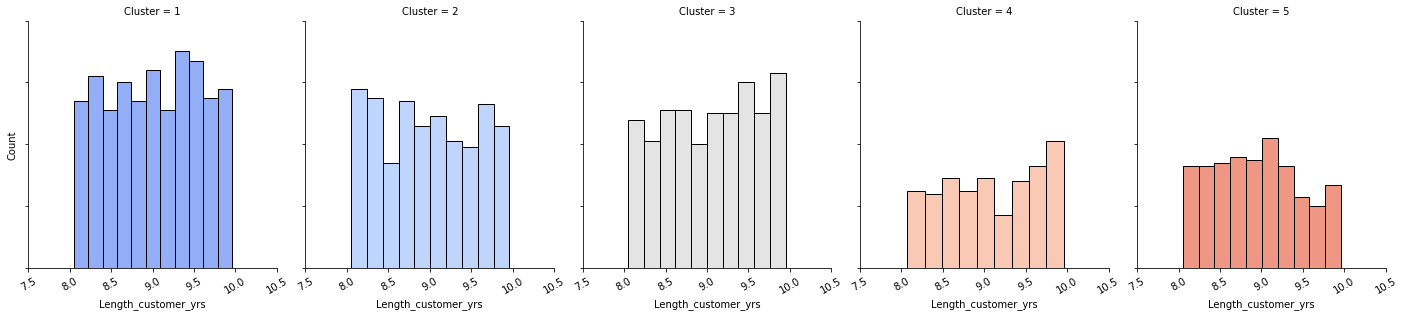

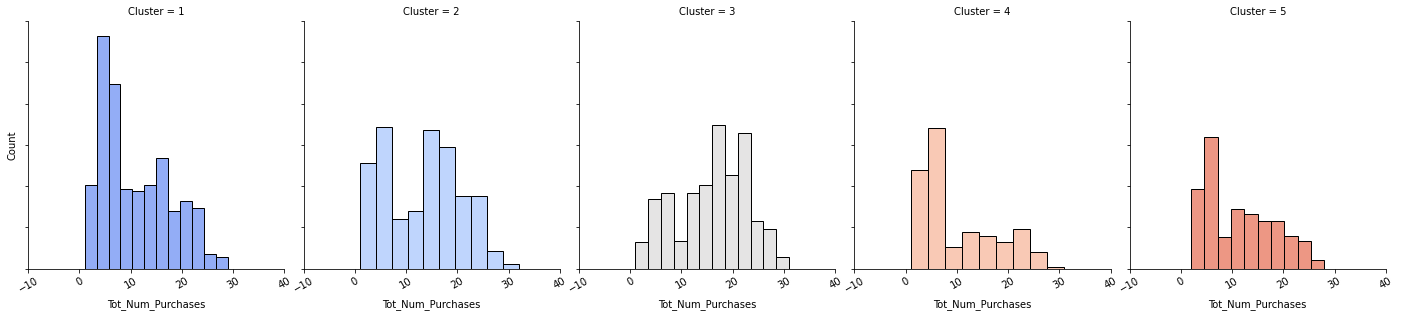

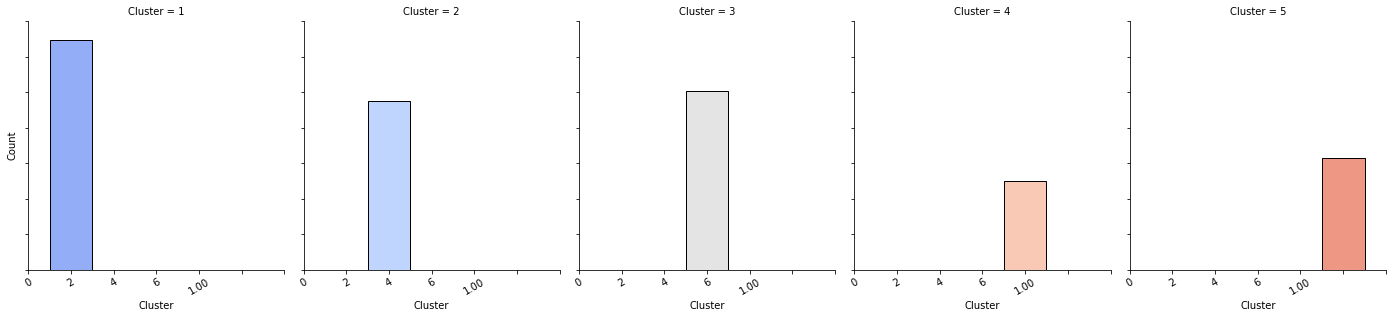

In [31]:
for i in seg_df:
    g = sns.FacetGrid(seg_df, col = "Cluster", hue = "Cluster", palette = "coolwarm", sharey=True,sharex=True)
    g.map(sns.histplot,i) 
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)

### Summary of Cluster characteristics

Cluster 1:
All customers have a Graduation level of education.
Most of the customers are in a relationship.
Most of the customers have at least 1 child.


Cluster 2:
Customers have a PhD.
This cluster has a mix of marital statuses, with the majority being in a relationship.
Have the second highest income level.
Has the highest average age.
On average has 1 dependent and that 1 child is most likely to be a teen.


Cluster 3:
Customers have graduation-level or Master-level education.
This cluster has a mix of all the marital statuses with the majority not being in a relationship.
The highest average income level.
Spends the most amount of money on food items, gold, and has the highest number of purchases.
Visits the website least frequently.
Least likely to make a purchase with a discount.
Customers are less likely to have children.


Cluster 4:
Customers have a basic or 2nd-cycle education level
Customers are mostly in a relationship.
The average income is the lowest.
Youngest demographic and overall spent the least amount on food items and has the least number of purchases
Spends the least on meat and wine products.


Cluster 5:
Customers have a Masters degree.
Most customers are in a relationship
Second-highest average age.

Cluaster 1 and 5 are very similar.

## Average Value of Features

In [34]:
def plot_cluster_feat(i: str):
    return seg_df.groupby('Cluster')[i].agg(['mean', 'median'])

In [50]:
seg_df.groupby('Cluster')['Dependents'].agg('sum')

Cluster
1    741
2    477
3    303
4    216
5    347
Name: Dependents, dtype: int64

In [48]:
plot_cluster_feat('Dependents')

,mean,median
Cluster,,
1,1.147059,1.0
2,1.004211,1.0
3,0.601190,1.0
4,0.860558,1.0
5,1.098101,1.0


In [35]:
# group_income = seg_df.groupby('Cluster')['Income'].agg(['mean', 'median'])
plot_cluster_feat('Income')

,mean,median
Cluster,,
1,46508.427245,44383.5
2,56008.185263,54959.0
3,61563.384921,65655.5
4,41757.964143,36301.0
5,50048.870253,48240.0


In [36]:
plot_cluster_feat('Tot_Num_Purchases')

,mean,median
Cluster,,
1,10.828173,9.0
2,13.423158,14.0
3,15.791667,17.0
4,10.155378,6.0
5,11.518987,10.0


In [51]:
plot_cluster_feat('NumWebPurchases')

,mean,median
Cluster,,
1,3.778638,3.0
2,4.429474,4.0
3,4.704365,4.0
4,3.326693,2.0
5,3.886076,3.0


In [38]:
plot_cluster_feat('Total_Food')

,mean,median
Cluster,,
1,378.139319,184.0
2,635.774737,446.0
3,895.261905,931.5
4,363.920319,66.0
5,455.455696,241.5


In [39]:
plot_cluster_feat('Age')

,mean,median
Cluster,,
1,52.445820,51.0
2,55.928421,55.0
3,52.587302,52.0
4,48.697211,46.0
5,55.360759,54.0


In [40]:
plot_cluster_feat('NumWebVisitsMonth')

,mean,median
Cluster,,
1,5.760062,6.0
2,5.269474,5.0
3,4.478175,4.0
4,5.784861,6.0
5,5.462025,6.0


In [41]:
plot_cluster_feat('MntGoldProds')

,mean,median
Cluster,,
1,39.012384,20.0
2,32.480000,16.0
3,68.220238,44.0
4,41.191235,25.0
5,36.471519,18.0


In [42]:
plot_cluster_feat('Recency')

,mean,median
Cluster,,
1,49.955108,50.0
2,48.273684,49.0
3,50.660714,51.0
4,48.346614,46.0
5,46.965190,48.0


In [43]:
plot_cluster_feat('MntWines')

,mean,median
Cluster,,
1,198.272446,84.5
2,401.568421,269.0
3,440.345238,387.0
4,156.772908,16.0
5,274.949367,140.0


In [44]:
plot_cluster_feat('MntMeatProducts')

,mean,median
Cluster,,
1,111.537152,42.0
2,168.372632,69.0
3,294.611111,216.0
4,113.163347,20.0
5,120.202532,46.5


In [45]:
plot_cluster_feat('MntFishProducts')

,mean,median
Cluster,,
1,27.041796,10.0
2,26.183158,6.0
3,68.269841,42.0
4,40.346614,15.0
5,24.212025,6.0


In [46]:
plot_cluster_feat('MntSweetProducts')

,mean,median
Cluster,,
1,20.750774,7.0
2,20.109474,3.0
3,46.636905,26.0
4,28.988048,8.0
5,17.579114,4.0


In [47]:
plot_cluster_feat('NumDealsPurchases')

,mean,median
Cluster,,
1,2.513932,2.0
2,2.389474,2.0
3,1.964286,1.0
4,2.151394,2.0
5,2.556962,2.0
